# Example 2: Markov Stability applied to directed graph

In [1]:
import networkx as nx

from pygenstability import run, plotting, constructors

In [2]:
# creating directed partitioned graph

nx_graph = nx.planted_partition_graph(4, 20, 0.3, 0.01, seed=42, directed=True)
adjacency = nx.to_scipy_sparse_matrix(nx_graph)

/tmp/ipykernel_54099/3871690300.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(nx_graph)


In [3]:
# defining the constructor externally

directed_constructor = constructors.load_constructor('directed', adjacency, alpha=0.85)

In [4]:
# scan markov scale for communities

all_results = run(adjacency, min_scale=-1, max_scale = 1, constructor=directed_constructor)

Your graph is directed!
100%|██████████| 20/20 [00:00<00:00, 84.59it/s]


In [5]:
# plot interactive

plotting.plot_scan(all_results, use_plotly=True)

(Figure({
     'data': [{'hovertemplate': '<b>scale</b>: %{x:.2f}, <br>%{text}<extra></extra>',
               'marker': {'color': 'blue'},
               'mode': 'lines+markers',
               'name': 'Stability',
               'text': [Number of communities: 46, <br> Stability: 0.897,
                        <br> Normalised Variation Information: 0.057, <br> Index: 0,
                        Number of communities: 38, <br> Stability: 0.877,
                        <br> Normalised Variation Information: 0.101, <br> Index: 1,
                        Number of communities: 33, <br> Stability: 0.854,
                        <br> Normalised Variation Information: 0.109, <br> Index: 2,
                        Number of communities: 25, <br> Stability: 0.828,
                        <br> Normalised Variation Information: 0.147, <br> Index: 3,
                        Number of communities: 22, <br> Stability: 0.798,
                        <br> Normalised Variation Information: 0.152, <br>

[None,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='NVI'>,
 <AxesSubplot:ylabel='Stability'>,
 <AxesSubplot:ylabel='Number of clusters'>,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='Optimal Scale Criterion'>]

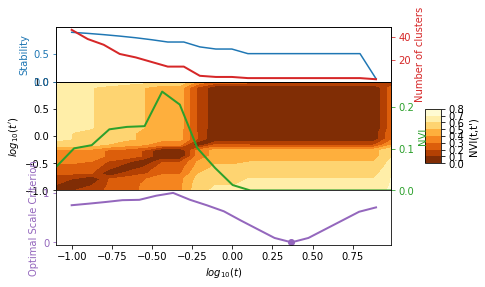

In [6]:
# plot matplotlib

plotting.plot_scan(all_results, use_plotly=False)

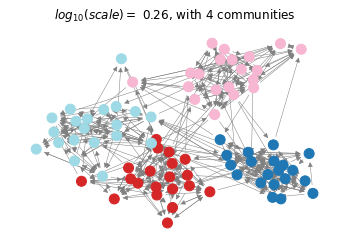

In [7]:
# plot partition at scale index t

pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]

t = 12;
plotting.plot_single_partition(nx_graph, all_results, t)


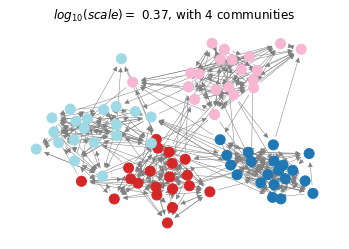

In [8]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph,all_results)

In [9]:
# plotting partitions at all scales in './communities' folder

plotting.plot_all_partitions(nx_graph, all_results)

100%|██████████| 20/20 [01:37<00:00,  4.90s/it]
